In [1]:
import ROOT
import my_library.constants as constants
import my_library.kinematic_cuts as cuts
import my_library.common_analysis_tools as tools

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)

In [3]:
df_pipkmks_v16 = ROOT.RDataFrame('pipkmks__B4_M16', '/work/halld/home/viducic/data/pipkmks/data/ver_test/pipkmks_v16.root')
df_pimkpks_v16 = ROOT.RDataFrame('pimkpks__B4_M16', '/work/halld/home/viducic/data/pimkpks/data/ver_test/pimkpks_v16.root')
df_pipkmks_v23 = ROOT.RDataFrame('pipkmks__ks_pippim__B4_M16', '/work/halld/home/viducic/data/pipkmks/data/ver_test/pipkmks_v23.root')
df_pimkpks_v23 = ROOT.RDataFrame('pimkpks__ks_pippim__B4_M16', '/work/halld/home/viducic/data/pimkpks/data/ver_test/pimkpks_v23.root')

In [4]:
df_pipkmks_v16 = tools.define_columns(df_pipkmks_v16, 'pipkmks')
df_pimkpks_v16 = tools.define_columns(df_pimkpks_v16, 'pimkpks')
df_pipkmks_v23 = tools.define_columns(df_pipkmks_v23, 'pipkmks')
df_pimkpks_v23 = tools.define_columns(df_pimkpks_v23, 'pimkpks')

In [5]:
df_pipkmks_v16 = tools.filter_dataframe(df_pipkmks_v16, 'pipkmks')
df_pipkmks_v23 = tools.filter_dataframe(df_pipkmks_v23, 'pipkmks')
df_pimkpks_v16 = tools.filter_dataframe(df_pimkpks_v16, 'pimkpks')
df_pimkpks_v23 = tools.filter_dataframe(df_pimkpks_v23, 'pimkpks')

In [6]:
df_pipkmks_v16 = df_pipkmks_v16.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS)
df_pipkmks_v23 = df_pipkmks_v23.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks_v16 = df_pimkpks_v16.Filter(cuts.KSTAR_ALL_CUT_PIMKPKS)
df_pimkpks_v23 = df_pimkpks_v23.Filter(cuts.KSTAR_ALL_CUT_PIMKPKS)

In [7]:
hist_pipkmks_v16 = df_pipkmks_v16.Histo1D(('pipkmks_v16', 'M(#pi^{+}K^{-}K_{S}^{0})', 40, 1.1, 1.5), 'pipkmks_m')
hist_pipkmks_v23 = df_pipkmks_v23.Histo1D(('pipkmks_v23', 'M(#pi^{+}K^{-}K_{S}^{0})', 40, 1.1, 1.5), 'pipkmks_m')
hist_pimkpks_v16 = df_pimkpks_v16.Histo1D(('pimkpks_v16', 'M(#pi^{-}K^{+}K_{S}^{0})', 40, 1.1, 1.5), 'pimkpks_m')
hist_pimkpks_v23 = df_pimkpks_v23.Histo1D(('pimkpks_v23', 'M(#pi^{-}K^{+}K_{S}^{0})', 40, 1.1, 1.5), 'pimkpks_m')

In [8]:
hist_pipkmks_v16.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pipkmks_v23.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['blue']))
hist_pimkpks_v16.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_pimkpks_v23.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['red']))

In [9]:
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist_pipkmks_v16.GetValue(), 'v16', 'l')
legend.AddEntry(hist_pipkmks_v23.GetValue(), 'v23', 'l')
legend.AddEntry(hist_pimkpks_v16.GetValue(), 'v16', 'l')
legend.AddEntry(hist_pimkpks_v23.GetValue(), 'v23', 'l')

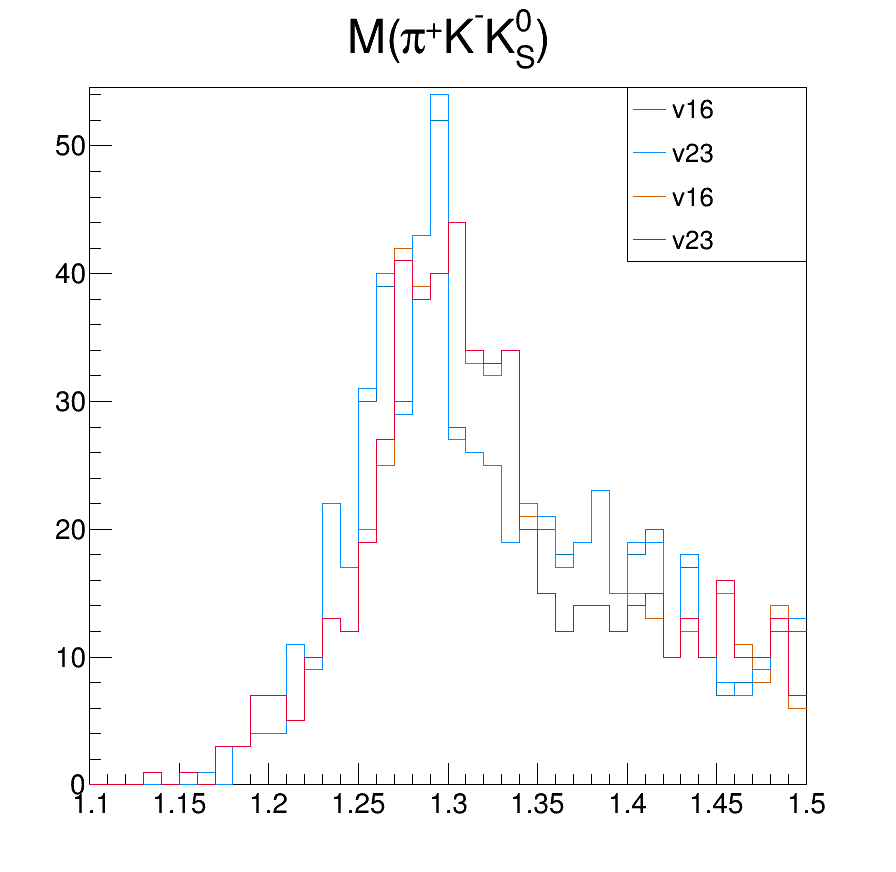

In [10]:
c = ROOT.TCanvas('c', 'c', 900, 900)
hist_pipkmks_v16.Draw()
hist_pimkpks_v16.Draw('same')
hist_pipkmks_v23.Draw('same')
hist_pimkpks_v23.Draw('same')
legend.Draw()
c.Draw()